In [1]:
######################################################################################################################
# Output of this script - 
#
#
######################################################################################################################




# BASE
import pandas as pd
import numpy as np
import sklearn
from sklearn import set_config
import pickle

#VISUALIZATION
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.tree import plot_tree


#??????????????????????? WHAT ARE YOU????????????????????????
from scipy.stats import mode                                                        #?????????????????????????????????
from sklearn.datasets import load_digits                                            #?????????????????????????????
from sklearn.decomposition import PCA                                               #??????????????????????????
from sklearn.manifold import TSNE                                                   #????????????????????????????
from sklearn.datasets import make_classification                                    #??????????????????????????
from scipy.special import expit                                                     #???????????????????????????


#VOTING
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from xgboost import XGBClassifier


#CLASIFIERS
from sklearn.tree import DecisionTreeClassifier                                     
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV                # search of the best params for random_forrest
from sklearn.linear_model import SGDClassifier                                      #????????????????????????
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors                                      #????????????????????????
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC                                                         #???????????
from sklearn.ensemble import AdaBoostClassifier                                     #?????????????




#REGRESSORS
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor 


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor





#CLASTERING
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import scipy.cluster.hierarchy as sch                                               #????????????????????????????




# SCALERS and TRANSFORMATION
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer

from sklearn.pipeline import TransformerMixin


# metrics and processing 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import train_test_split
from scipy.stats import zscore, boxcox
from sklearn.model_selection import cross_val_score                                 #??????????????????????????



# EDA data treatment
import missingno


# other (mainly system libs)
import warnings
import sys
from io import StringIO
import time
import os
import shutil
from dotenv import load_dotenv
from sqlalchemy import create_engine
import itertools
from collections import Counter
import urllib.request as req
import zipfile
import csv
import re
from nltk.tokenize import word_tokenize
import string
import joblib

In [2]:
#####################################################
# Constants

SEED = 50
FILE = './data/glove.840B.300d.txt'
#FILE = './data/glove.6B.50d.txt'


STOP_WORDS_FULL = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 
'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 
'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 
'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 
'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 
'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 
'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 
'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 
's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y',
 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 
'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
 "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 
'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

STOP_WORDS_SHORT = ['a', 'an', 'the', 'as', 'while', 'of', 'by', 'for', 'to', 
'then', 'so', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'd', 'll', 'm', 'o', 're', 've', 'y',
 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 
'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
 "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 
'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

ZERO_VECTOR = [0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0
            ]
################################################################

# Loading splits for processing
X_train = pd.read_csv('./data/X_train.csv')
X_test = pd.read_csv('./data/X_test.csv')
y_train = pd.read_csv('./data/y_train.csv')
y_test = pd.read_csv('./data/y_test.csv')

In [3]:
#class MyDataTransformer(TransformerMixin):
#    def __init__(self):
#        pass
#    def fit(self, X, y=None):
#        self.biggest_value = X.c1.max()
#        return self
#    def transform(self, X):
#        return X.loc[X.c1 <= self.biggest_value]
#X=load_some_pandas_dataframe()
#pipeline.fit(X)
#joblib.dump(pipeline, 'pipeline.pkl')



def load_glove_library(file): #Borrowed with little modifications from https://stackoverflow.com/questions/37793118/load-pretrained-glove-vectors-in-python
    print('Loading GloVe library '+ file)
    glove_model = {}
    with open(file,'r', encoding='utf-8') as f:
        for line in f:
            word = line.split(' ')[0]
            glove_model[str(word)] = np.array(line.split()[1:], dtype=np.float64)
    print(f"{len(glove_model)} words loaded!")
    return glove_model

def load_glove_large(file):
    df = pd.read_csv(file, sep=" ", quoting=3, header=None, index_col=0)
    glove_model = {key: val.values for key, val in df.T.items()}
    return glove_model

def log_transform(df:pd.DataFrame , colname)-> pd.DataFrame:
    return pd.DataFrame(np.log1p(df[colname]), columns=[colname])




def text_prep(text):
    text=text.lower()
    for val in list(string.whitespace)[1:]:
        while val in text:
            text = text.replace(val, ' ')
    for char in ",.-=+_!?:;@#/|\$%^&*()[]{}":
        while (char in text):
            text = text.replace(char, ' ')
    while '"' in text:
        text = text.replace('"', ' ')
    while "'" in text:
        text = text.replace("'", ' ')
    while " "*6 in text:
        text = text.replace(" "*6, ' ')
    while " "*5 in text:
        text = text.replace(" "*5, ' ')
    while " "*4 in text:
        text = text.replace(" "*4, ' ')
    while " "*3 in text:
        text = text.replace(" "*3, ' ')
    while " "*2 in text:
        text = text.replace(" "*2, ' ')
    text = text.strip()
    return text

def whole_name_vectorizer(text, model):
    sent_vec = ZERO_VECTOR
    numw = 0
    for wrd in text.split():
        try:
            if numw == 0:
                try :sent_vec = model[wrd]
                except: sent_vec = ZERO_VECTOR
            else:
                try: sent_vec = np.add(sent_vec, model[wrd])
                except: sent_vec = np.add(sent_vec, ZERO_VECTOR)
            numw+=1
        except:
            pass
    
    return np.asarray(sent_vec) / numw




#For column transformer:
def names_vectorizer(df:pd.DataFrame, colname, model)-> pd.DataFrame:
    df['vec'+colname] = df[colname].astype('string').str.lower()
    df['vec'+colname] = df['vec'+colname].apply(lambda x: text_prep(x))
    for itr in range(df['vec'+colname].shape[0]):
        df['vec'+colname].iloc[itr] = whole_name_vectorizer(df['vec'+colname].iloc[itr], model)
    return pd.DataFrame(df['vec'+colname], columns=['vec'+colname])

#For pipline:
#def names_vectorizer_pipeline(sentence):
#    sent_vec = ZERO_VECTOR
#    numw = 0
#    for wrd in sentence.split():
#        try:
#            if numw == 0:
#                try :sent_vec = GLOVE_LIB[wrd]
#                except: sent_vec = ZERO_VECTOR
#            else:
#                try: sent_vec = np.add(sent_vec, GLOVE_LIB[wrd])
#                except: sent_vec = np.add(sent_vec, ZERO_VECTOR)
#            numw+=1
#        except:
#            pass
#    return np.asarray(sent_vec) / numw




def calc_dol_p_back(df:pd.DataFrame)-> pd.DataFrame:
    df['backers_adj'] = df['backers'] + (0.01)
    df['dol_p_back'] = df['pledged']/df['backers_adj']
    return pd.DataFrame(df['dol_p_back'])

def calc_dol_p_day(df:pd.DataFrame)-> pd.DataFrame:
    try: df['tdol_p_day'] = df['pledged']/(df['deadline'] - df['launched']).dt.days.astype('int')
    except: df['tdol_p_day'] = 0
    return pd.DataFrame(df['tdol_p_day'])



# Formating dates
def pre_processing_dates(df:pd.DataFrame , colname)-> pd.DataFrame:
    df[colname] = pd.to_datetime(df[colname])
    df[colname+'_day_frac'] = df[colname].dt.day/31
    df[colname+'_month_frac'] = df[colname].dt.month/12
    df[colname+'_year_frac'] = df[colname].dt.year/2024
    df[colname+'_dow'] = df[colname].dt.day_name()
    return pd.DataFrame(df[[colname+'_day_frac',colname+'_month_frac',colname+'_year_frac']].join(pd.get_dummies(df[colname+'_dow'], prefix='launched', prefix_sep='_', drop_first = False, dtype=float))   )

def duration_years(df:pd.DataFrame)-> pd.DataFrame:
    df['launched'] = pd.to_datetime(df['launched'], format='%Y-%m-%d %H:%M:%S')
    df['deadline'] = pd.to_datetime(df['deadline'], format='%Y-%m-%d')
    df['duration_years'] = df['deadline'] - df['launched']
    df['duration_years'] = df['duration_years'].dt.days.astype('int')
    return pd.DataFrame(df['duration_years']/365)

def duration_days(df:pd.DataFrame)-> pd.DataFrame:
    df['launched'] = pd.to_datetime(df['launched'], format='%Y-%m-%d %H:%M:%S')
    df['deadline'] = pd.to_datetime(df['deadline'], format='%Y-%m-%d')
    df['duration_years'] = df['deadline'] - df['launched']
    df['duration_years'] = df['duration_years'].dt.days.astype('int')
    return pd.DataFrame(df['duration_years'])

def goal_lin_norm(df:pd.DataFrame , colname)-> pd.DataFrame:
    return pd.DataFrame(df[colname]/df[colname].max())

# Just in case...
def keep_initial(df:pd.DataFrame , columns)-> pd.DataFrame:
    return pd.DataFrame(df[columns])

def kmeans(df:pd.DataFrame , columns)-> pd.DataFrame:
    pass
    return

COLUMNS_TO_KEEP = []
GLOVE_LIB = load_glove_large(FILE)

preprocessor = ColumnTransformer(transformers=[
#                    ('av_vec', name_pipeline, ['name']),
                    ('av_vec', FunctionTransformer(names_vectorizer, kw_args={'colname':'name', 'model':GLOVE_LIB}, validate=False), ['name']),
                    ('ct', OneHotEncoder(drop=None, handle_unknown='infrequent_if_exist', sparse_output=False), ['category']),
#                    ('sct', OneHotEncoder(drop=None, handle_unknown='infrequent_if_exist', sparse_output=False), ['subcategory']),
                    ('ctry', OneHotEncoder(drop=None, handle_unknown='infrequent_if_exist', sparse_output=False), ['country']),
#                    ('l', FunctionTransformer(pre_processing_dates, kw_args={'colname':'launched'}, validate=False), ['launched']),
#                    ('d', FunctionTransformer(pre_processing_dates, kw_args={'colname':'deadline'}, validate=False), ['deadline']),
#                    ('dpb', FunctionTransformer(calc_dol_p_back, validate=False), ['backers', 'pledged']),
                    ('dpd', FunctionTransformer(calc_dol_p_day, validate=False), ['pledged']),
#                    ('cdy', FunctionTransformer(duration_years, validate=False), ['launched', 'deadline']),
                    ('cdd', FunctionTransformer(duration_days, validate=False), ['launched', 'deadline']),
                    ('log', FunctionTransformer(log_transform, kw_args={'colname':'goal'}, validate=False), ['goal'])
#                    ('fmaxg', FunctionTransformer(goal_lin_norm, kw_args={'colname':'goal'}, validate=False), ['goal'])
#                    ('fmaxp', FunctionTransformer(goal_lin_norm, kw_args={'colname':'pledged'}, validate=False), ['pledged']),
#                    ('fmaxb', FunctionTransformer(goal_lin_norm, kw_args={'colname':'backers'}, validate=False), ['backers']),
#                    ('original', FunctionTransformer(keep_initial, kw_args={'columns':COLUMNS_TO_KEEP}, validate=False), COLUMNS_TO_KEEP)
                    ],remainder='drop').set_output(transform="pandas")


#data_pipeline = Pipeline(steps =  [
#                            ('trsfr', preprocessor)
#                            ('scale', StandardScaler()),
#                            ('pca', PCA(0.99, random_state=0)),
#                            ('bins', KMeans(n_clusters=14, init='k-means++', max_iter=1000, n_init='auto', random_state=SEED))
#])


X_train_transf = preprocessor.fit_transform(X_train)
X_test_transf = preprocessor.transform(X_test)

#X_train_transf = data_pipeline.fit_transform(X_train)
#X_test_transf = data_pipeline.transform(X_test)

#joblib.dump(data_pipeline, './models/pipeline_joblib.pkl')
#pipeline = joblib.load('./models/pipeline_pkl.pkl')
#X_test_load = pipeline.transform(X_test)

d:\DSMLAI\ML_GroupProject\.venv\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:343: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


In [4]:
X_train_transf = preprocessor.fit_transform(X_train)
X_test_transf = preprocessor.transform(X_test)

In [5]:
# TAKES MUCH TIME!!! (ca. 35 min.)
#wcss = []
#for i in range(1, 100):
#    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 200, n_init = 'auto', random_state = SEED)
#    km.fit(X_train_transf['av_vec__vecname'].values.tolist() )
#    wcss.append(km.inertia_)


In [6]:


#fig=plt.figure(figsize=(10,6))  


#plt.plot(range(1, 12), wcss[0:11], color='cornflowerblue', linestyle='-')
#plt.plot(range(29, 100), wcss[28:99], color='cornflowerblue', linestyle='-')
#plt.plot(range(11, 30), wcss[10:29], 'r:')
#plt.title('The Elbow Method', fontsize = 20)
#plt.xlabel('No. of Clusters', fontsize = 14)
#plt.ylabel('wcss', fontsize = 14)
#plt.xticks(size=12)
#plt.yticks(size=12)
#fig.text(0.3,0.5,"The best k-value is ca.10-30", fontsize = 14)
#plt.savefig('./model_images/Elbow(2.4d)1-100.png', transparent=True)
#plt.show()

#fig=plt.figure(figsize=(10,6)) 
#plt.plot(range(1, 10), wcss[0:9], color='cornflowerblue', linestyle='-')
#plt.plot(range(14, 50), wcss[13:49], color='cornflowerblue', linestyle='-')
#plt.plot(range(9, 15), wcss[8:14], 'r:')
#plt.plot(range(14, 15), wcss[13:14], color='red', linestyle=':', marker='D')
#plt.title('The Elbow Method', fontsize = 20)
#plt.xlabel('No. of Clusters', fontsize = 14)
#plt.ylabel('wcss', fontsize = 14)
#plt.xticks(size=12)
#plt.yticks(size=12)
#fig.text(0.35,0.4,"The best k-value is ca.14", fontsize = 14)
#plt.savefig('./model_images/Elbow(2.4d)1-50.png', transparent=True)
#plt.show()

In [7]:
clasters = KMeans(n_clusters=14, init='k-means++', max_iter=1000, n_init='auto', random_state=SEED)

X_train_transf['name_cluster'] = pd.Series(clasters.fit_predict(X_train_transf['av_vec__vecname'].values.tolist() ),  name='name_cluster')
X_test_transf['name_cluster'] = pd.Series(clasters.predict(X_test_transf['av_vec__vecname'].values.tolist()),  name='name_cluster')

X_train_transf = X_train_transf.drop('av_vec__vecname', axis=1)
X_test_transf = X_test_transf.drop('av_vec__vecname', axis=1)

names_cats_enc = OneHotEncoder(drop=None, handle_unknown='infrequent_if_exist', sparse_output=False)



In [8]:
X_train_transf = pd.DataFrame(X_train_transf)
X_test_transf = pd.DataFrame(X_test_transf)


X_train_transf = pd.concat( [pd.DataFrame(X_train_transf), pd.DataFrame(names_cats_enc.fit_transform(pd.DataFrame(X_train_transf['name_cluster']) ))], axis=1 )
X_test_transf = pd.concat( [pd.DataFrame(X_test_transf), pd.DataFrame(names_cats_enc.transform(pd.DataFrame(X_test_transf['name_cluster']) ))], axis=1 )


X_train_transf = X_train_transf.drop('name_cluster', axis=1)
X_test_transf = X_test_transf.drop('name_cluster', axis=1)

In [9]:
newcols = []
for val in X_train_transf.columns.tolist():
    if val in range(0, 51, 1):
        newcols.append('cat_'+str(val))
    else:
        newcols.append(val)

X_train_transf.columns = newcols
X_test_transf.columns = newcols

In [10]:
#################################################################################################
#                                          BASE MODEL
model_BASE = LogisticRegression(penalty='l2', random_state=SEED, solver='lbfgs', max_iter=100, n_jobs=10, l1_ratio=None)

model_BASE.fit(X_train_transf, y_train.values.ravel())
##################################################################################################
predict_BASE = model_BASE.predict(X_test_transf)
proba_BASE = model_BASE.predict_proba(X_test_transf)
conf_mat_BASE = confusion_matrix(y_test, predict_BASE)

In [11]:
#################################################################################################
#                                           MODEL           4d
model_4 = RandomForestClassifier(n_estimators=200, random_state=SEED, n_jobs=-1, verbose = 1)
model_4.fit(X_train_transf, y_train.values.ravel())
##################################################################################################

#filename = 'models/Dima_random_forrest_COM_w_namevec_bins_large.sav'
#pickle.dump(model_4, open(filename, 'wb'))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   28.4s finished


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=50, verbose=1)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    1.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    1.5s finished


              precision    recall  f1-score   support

           0       0.64      0.85      0.73     39523
           1       0.58      0.30      0.40     26770

    accuracy                           0.63     66293
   macro avg       0.61      0.58      0.56     66293
weighted avg       0.62      0.63      0.60     66293



<Axes: >

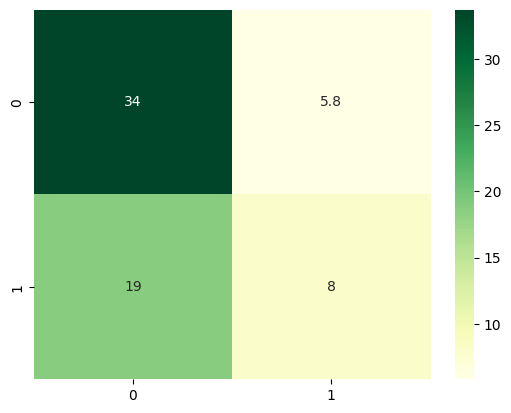

In [12]:
#pred_4 = model_4.predict(X_test_transf)
pred_4 = (model_4.predict_proba(X_test_transf)[:,1] >= 0.65).astype(bool)
proba_4 = model_4.predict_proba(X_test_transf)

conf_mat_4 = confusion_matrix(y_test, pred_4)/1000
print(classification_report(y_test, pred_4))
sns.heatmap(conf_mat_4, annot=True,  cmap='YlGn')

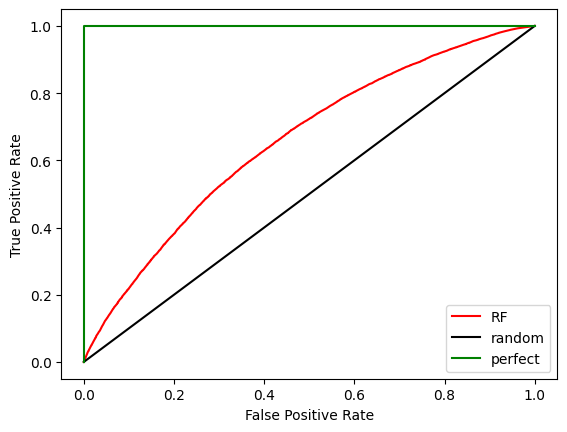

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, pd.DataFrame(proba_4).iloc[:,1])

plt.plot(fpr, tpr,'r',label = 'RF')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1],[0,1,1],'g-',label='perfect')
#plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [14]:
param_grid = {
    'n_estimators': np.arange(80, 110, 10).astype(int),
    'max_depth': [10,15, 20],
    'max_features': [0.8, 0.99],
    'min_samples_split': [15,20],
    'min_samples_leaf': [5, 15],
    'bootstrap': [True]
}
best_yet = {'n_estimators': 50,
 'min_samples_split': 15,
 'min_samples_leaf': 10,
 'max_features': 0.8,
 'max_depth': 20,
 'bootstrap': True}

#param_grid = {
#    'n_estimators': np.arange(50, 150, 10).astype(int),
#    'max_depth': [10, None],
#    'max_features': ['sqrt', 0.8],
#    'min_samples_split': [5, 10, 15],
#    'min_samples_leaf': [1, 5, 15],
#    'bootstrap': [True, False]
#}

estimator = RandomForestClassifier(random_state=SEED, n_jobs=10, verbose = 1
#    class_weight={0: 1, 1: 3}  # Weight class `1` higher
)

model_4_BEST = RandomizedSearchCV(
    estimator,
    param_grid,
    n_jobs=10,
    scoring='average_precision',  # Focuses on the precision-recall tradeoff
    cv=3,
    n_iter=1,
    verbose=10,
    random_state=SEED
)


In [15]:
#WARNING! Takes some time to run - ca. 3min.
model_4_BEST.fit(X_train_transf, y_train.values.ravel())


#y_train.values.ravel()



Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   12.9s
[Parallel(n_jobs=10)]: Done  80 out of  80 | elapsed:   36.4s finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=10, random_state=50,
                                                    verbose=1),
                   n_iter=1, n_jobs=10,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 15, 20],
                                        'max_features': [0.8, 0.99],
                                        'min_samples_leaf': [5, 15],
                                        'min_samples_split': [15, 20],
                                        'n_estimators': array([ 80,  90, 100])},
                   random_state=50, scoring='average_precision', verbose=10)

In [16]:
model_4_BEST.best_params_

{'n_estimators': 80,
 'min_samples_split': 20,
 'min_samples_leaf': 15,
 'max_features': 0.99,
 'max_depth': 15,
 'bootstrap': True}

In [17]:
pred_4_BEST = (model_4_BEST.predict_proba(X_test_transf)[:,1] >= 0.5).astype(bool)
proba_4_BEST = model_4_BEST.predict_proba(X_test_transf)
fpr_BEST, tpr_BEST, thresholds_BEST = roc_curve(y_test, pd.DataFrame(proba_4_BEST).iloc[:, 1])
fpr_BASE, tpr_BASE, thresholds_BASE = roc_curve(y_test, pd.DataFrame(proba_BASE).iloc[:, 1])
fpr_4, tpr_4, thresholds_4 = roc_curve(y_test, pd.DataFrame(proba_4).iloc[:, 1])  


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  80 out of  80 | elapsed:    0.1s finished


In [18]:
feature_importance_table = pd.DataFrame(zip(X_test_transf.columns, model_4_BEST.best_estimator_.feature_importances_), columns=['feature', 'importance'])

feature_importance_table.sort_values('importance', ascending=False)


,feature,importance
39,log__goal,0.436809
38,cdd__duration_years,0.236323
10,ct__category_Music,0.038905
14,ct__category_Theater,0.032687
1,ct__category_Comics,0.025886
5,ct__category_Fashion,0.018282
36,ctry__country_United States,0.018079
6,ct__category_Film & Video,0.017925
8,ct__category_Games,0.015995
3,ct__category_Dance,0.015456


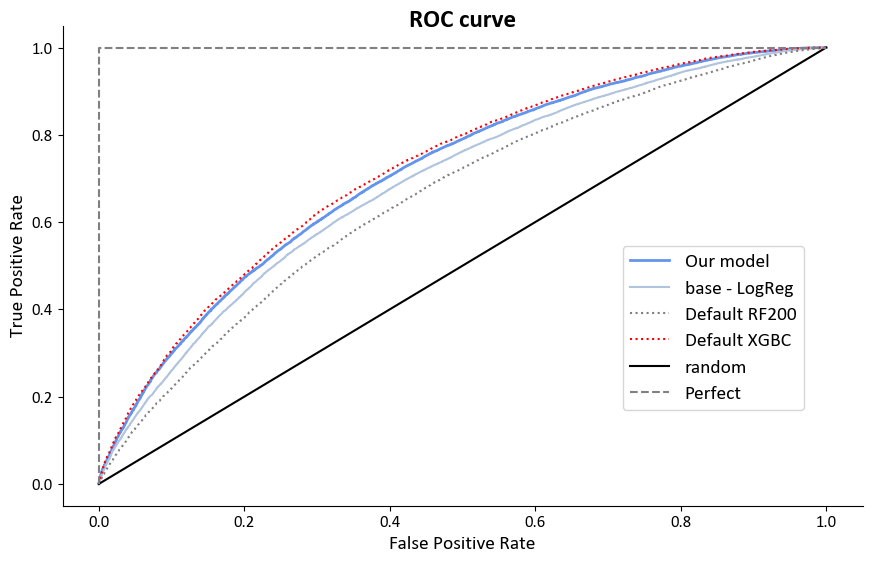

############################## BEST RF ##############################
              precision    recall  f1-score   support

           0       0.69      0.80      0.74     39523
           1       0.62      0.47      0.54     26770

    accuracy                           0.67     66293
   macro avg       0.65      0.64      0.64     66293
weighted avg       0.66      0.67      0.66     66293

 AUC OUR MODEL:  0.6365651839160699
############################## BASE LogReg ##############################
              precision    recall  f1-score   support

           0       0.67      0.81      0.74     39523
           1       0.60      0.42      0.49     26770

    accuracy                           0.65     66293
   macro avg       0.64      0.62      0.61     66293
weighted avg       0.64      0.65      0.64     66293

 AUC Base model:  0.6150710025231687


In [25]:
plt.rcParams["font.family"] = "Calibri"

fig, ax = plt.subplots(figsize=(10,6))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
#plt.figure(figsize=(8,6))
plt.plot(fpr_BEST, tpr_BEST,'-', color='cornflowerblue',label = 'Our model', linewidth=2)
plt.plot(fpr_BASE, tpr_BASE,'-', color='lightsteelblue', label = 'base - LogReg')
plt.plot(fpr_4, tpr_4,':', color='grey', label = 'Default RF200')
plt.plot(fpr_xgb, tpr_xgb,':', color='red', label = 'Default XGBC')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1],[0,1,1],'--', color='grey', label='Perfect')
#plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend(loc=(0.7,0.2), fontsize=14)
plt.title('ROC curve', size=18,fontweight="bold", y=0.98)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.savefig('./model_images/ROC_curve(2.4d).png', transparent=True)
plt.show()

conf_mat_4_BEST = confusion_matrix(y_test, pred_4_BEST)/1000
print('###'*10 + ' BEST RF ' + '###'*10)
print(classification_report(y_test, pred_4_BEST))
print(' AUC OUR MODEL: ', roc_auc_score(y_test, pred_4_BEST))
print('###'*10 + ' BASE LogReg ' + '###'*10)
print(classification_report(y_test, predict_BASE))
print(' AUC Base model: ', roc_auc_score(y_test, predict_BASE))




#sns.heatmap(conf_mat_4_BEST, annot=True,  cmap='YlGn').set_title("Our RF model")
#plt.show()
#sns.heatmap(conf_mat_BASE/1000, annot=True,  cmap='YlGn').set_title("Base model")
#plt.show()

In [20]:
feature_importance_table = pd.DataFrame(zip(X_test_transf.columns, model_4_BEST.best_estimator_.feature_importances_), columns=['feature', 'importance'])

feature_importance_table.sort_values('importance', ascending=False, inplace=True)
feature_importance_table['importance'] = feature_importance_table['importance'].round(3)
feature_importance_table.feature.iloc[0:11]

39                      log__goal
38            cdd__duration_years
10             ct__category_Music
14           ct__category_Theater
1             ct__category_Comics
5            ct__category_Fashion
36    ctry__country_United States
6       ct__category_Film & Video
8              ct__category_Games
3              ct__category_Dance
13        ct__category_Technology
Name: feature, dtype: object

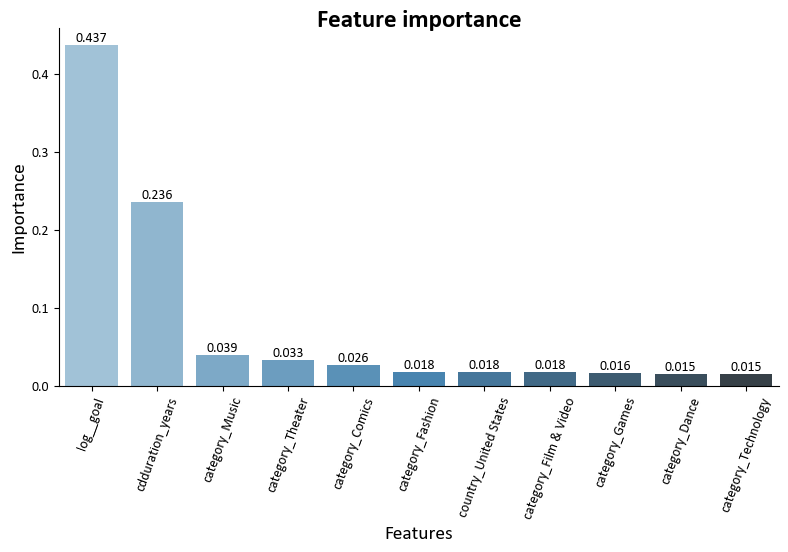

In [24]:
labels_f_plot = feature_importance_table.feature.iloc[0:11]
labels_f_plot = [val.replace('fmaxb__', '').replace('fmaxp__', '').replace('fmaxg__', '').replace('dpb__', '').replace('cdy__', '').replace('l__', '').replace('d__', '').replace('ct__', '').replace('ctry__', '') for val in labels_f_plot]

fig, ax = plt.subplots(figsize=(9,5.5))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.25)
ax = sns.barplot(feature_importance_table,
    x=feature_importance_table['feature'].iloc[0:11],
    y=feature_importance_table['importance'].iloc[0:11],
#    index=labels_f_plot,
    palette='Blues_d'
)
ax.set_xlabel('Features', size=14)
ax.set_ylabel('Importance', size=14)
ax.set_xticklabels(labels_f_plot)
plt.xticks(rotation=70)
plt.title('Feature importance', size=18,fontweight="bold", y=0.98)
ax.bar_label(ax.containers[0], fontsize=10);
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)


plt.savefig('./model_images/Feat_imp(2.4d).png', transparent=True)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    1.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    1.7s finished


############################## XGBC ##############################
              precision    recall  f1-score   support

           0       0.69      0.80      0.74     39523
           1       0.62      0.48      0.54     26770

    accuracy                           0.67     66293
   macro avg       0.66      0.64      0.64     66293
weighted avg       0.66      0.67      0.66     66293



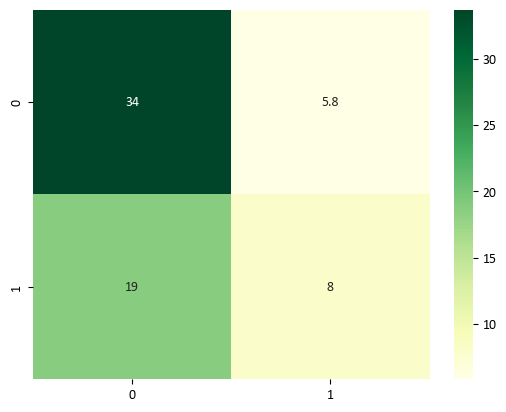

In [22]:
#################################################################################################
#                                           MODEL           XGBOOST
model_4_xgbc = XGBClassifier()
model_4_xgbc.fit(X_train_transf, y_train.values.ravel())
##################################################################################################
pred_4 = (model_4.predict_proba(X_test_transf)[:,1] >= 0.65).astype(bool)
proba_4 = model_4.predict_proba(X_test_transf)

sns.heatmap(conf_mat_4, annot=True,  cmap='YlGn')


pred_4_xgbc = (model_4_xgbc.predict_proba(X_test_transf)[:,1] >= 0.5).astype(bool)
proba_4_xgbc = model_4_xgbc.predict_proba(X_test_transf)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, pd.DataFrame(proba_4_xgbc).iloc[:, 1])

conf_mat_4_xgbc = confusion_matrix(y_test, pred_4_xgbc)/1000
print('###'*10 + ' XGBC ' + '###'*10)
print(classification_report(y_test, pred_4_xgbc))